In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Tasks:
1- Find Predictive Variables,
2- PREDICT THE DATA SET ON BASIC OF MALE AND FEMALE

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
corr = df.corr()

In [6]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

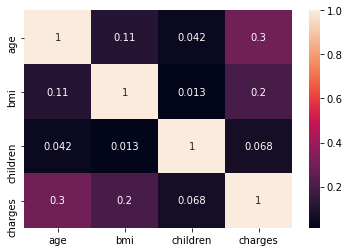

In [8]:
sns.heatmap(corr, annot=True)

530.1

In [10]:
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)

In [11]:
df['smoker'] = pd.get_dummies(df['smoker'], drop_first=True)
df['region'] = pd.get_dummies(df['region'], drop_first=True)

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
corr1 = df.corr()

In [14]:
corr1

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.000407,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.011156,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.135996,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.024806,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.036945,0.787251
region,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,1.000000,-0.039905
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039905,1.000000


<AxesSubplot:>

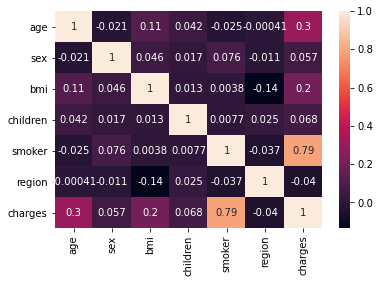

In [16]:
sns.heatmap(corr1, annot=True)

So, charges is strongly positive correlated with smoker and also correlated with other features.
Thus, our predicted variable is 'charges'.

Let's build a linear regression model for the charges prediction.

In [18]:
X = df.drop('charges', axis=1)
y = df['charges']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [20]:
X_train.shape

(1070, 6)

In [21]:
X_test.shape

(268, 6)

In [27]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
model.score(x_test,y_test)

0.7979920708813732

In [32]:
y_pred = model.predict(x_test)

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("coefficient of determination :", r2)
print("mean squared error :", mse)
print("root mean squared error :", rmse)



coefficient of determination : 0.7979920708813732
mean squared error : 32145514.14941769
root mean squared error : 5669.701416249157


So, our model accuracy is 79.7%.

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
rfr_model.score(x_test,y_test)

0.8788093680790469

In [36]:
# So, our rfr_model's accuracy is 87.8%.

In [55]:
# Ltt's do parameter tunning to improve our model's accuracy.
rfr_model1 = RandomForestRegressor(n_estimators=1200, min_samples_split=12,min_samples_leaf=12,n_jobs=6)
rfr_model1.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=12, min_samples_split=12,
                      n_estimators=1200, n_jobs=6)

In [56]:
rfr_model1.score(x_test,y_test)

0.8990521873774936

So, the accuracy of the model is increased by 10% which is good :)

In [57]:
rfr_model1.score(x_train,y_train)

0.8760926489260222

In [ ]:
# As we can see, if we were tyring to improve our model's accuracy then there is a chance of overfitting.